#### Removing Projective Distortion
This part of the assignment demonstrates how to remove projective distortion 
from a photographed document using a homography (projective transformation).

Affine corner coordinates of the document are manually read (using Paint) from the image
and automatically converted into homogeneous coordinates of the form (x, y, 1).  
Using these four points, the custom projective mapping function `projPres` constructs
a homography that maps the distorted quadrilateral into an ideal rectangle.

The target rectangle dimensions (800×1200) define the shape of the rectified document.
After computing the transformation matrix, `cv2.warpPerspective` applies the mapping
to the entire image, producing a clean, front-facing version of the page.

The result shows the original photograph next to the rectified document,
revealing the removal of perspective distortion.


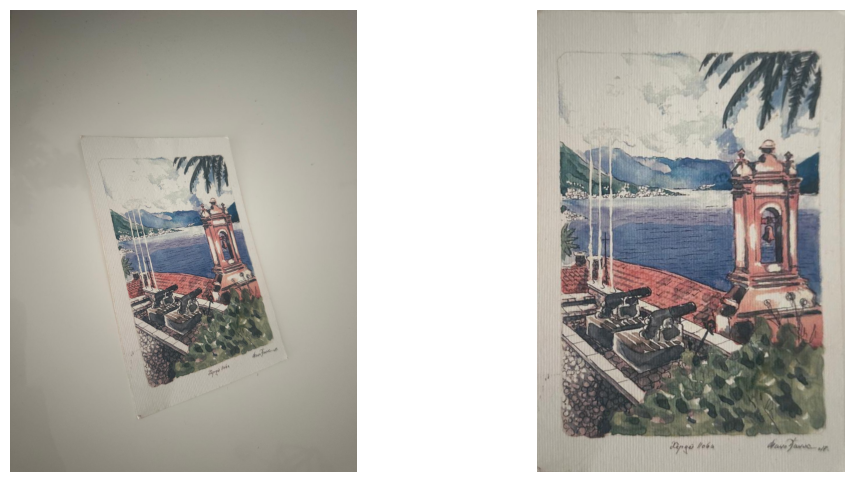

True

In [1]:
import cv2
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

def to_hom(pts_affine):
    return np.array([[x, y, 1] for x, y in pts_affine], dtype=np.float32)

def projPres0(pts):
    l1 = la.det(np.array([pts[3], pts[1], pts[2]]).T)
    l2 = la.det(np.array([pts[0], pts[3], pts[2]]).T)
    l3 = la.det(np.array([pts[0], pts[1], pts[3]]).T)
    return np.array([l1 * pts[0], l2 * pts[1], l3 * pts[2]]).T

def projPres(pts1, pts2):
    P = projPres0(pts1)
    Q = projPres0(pts2)
    return np.dot(Q, la.inv(P))

img = cv2.imread("document.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pts_src_affine = [
    (245, 437),
    (752, 438),
    (958, 1207),
    (447, 1416)
]

pts_src = to_hom(pts_src_affine)

w, h = 800, 1200

pts_dst_affine = [
    (0, 0),
    (w, 0),
    (w, h),
    (0, h)
]

pts_dst = to_hom(pts_dst_affine)

H = projPres(pts_src, pts_dst)
rectified = cv2.warpPerspective(img_rgb, H, (w, h))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(rectified); plt.axis("off")
plt.show()

cv2.imwrite("rectified_result.jpg", cv2.cvtColor(rectified, cv2.COLOR_RGB2BGR))
